## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [160]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [161]:
# import data
df=pd.read_csv('ab_data.csv')

# show top rows
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [224]:
df.shape

(294478, 5)

In [162]:
df.describe(include="all")

,user_id,timestamp,group,landing_page,converted
count,294478.000000,294478,294478,294478,294478.000000
unique,NaN,294478,2,2,NaN
top,NaN,2017-01-17 11:49:10.854726,treatment,old_page,NaN
freq,NaN,1,147276,147239,NaN
mean,787974.124733,NaN,NaN,NaN,0.119659
std,91210.823776,NaN,NaN,NaN,0.324563
min,630000.000000,NaN,NaN,NaN,0.000000
25%,709032.250000,NaN,NaN,NaN,0.000000
50%,787933.500000,NaN,NaN,NaN,0.000000
75%,866911.750000,NaN,NaN,NaN,0.000000


b. Use the below cell to find the number of rows in the dataset.

In [163]:
df.shape


(294478, 5)

c. The number of unique users in the dataset.

In [164]:
len(df.user_id.unique())


290584

d. The proportion of users converted.

In [165]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [166]:
a = (df[(df.group == 'treatment') & (df.landing_page != 'new_page')]).user_id.unique()
b = (df[(df.group != 'treatment') & (df.landing_page == 'new_page')]).user_id.unique()

In [167]:
len(a) + len(b)
#print(len(df.user_id.unique()) - len(a))

3893

f. Do any of the rows have missing values?

In [168]:
df.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
294448    0
294449    0
294450    0
294451    0
294452    0
294453    0
294454    0
294455    0
294456    0
294457    0
294458    0
294459    0
294460    0
294461    0
294462    0
294463    0
294464    0
294465    0
294466    0
294467    0
294468    0
294469    0
294470    0
294471    0
294472    0
294473    0
294474    0
294475    0
294476    0
294477    0
Length: 294478, dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [169]:
# import data
df2=pd.read_csv('ab_data.csv')

In [170]:

df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == True]

In [171]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [172]:
len(df2.user_id.unique())


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [173]:
ids = df2["user_id"]
df2[ids.isin(ids[ids.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [174]:
ids = df2["user_id"]
df2[ids.isin(ids[ids.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [213]:
# Drop duplicated user
df2.drop(labels = 2893, axis=0, inplace=True)

In [214]:
# Check the drop worked
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,1,1


In [215]:
# as seen above, 290584 entries now as entry with index 1876 is deleted
# we can confirm by checking unique values of user ids
len(df2['user_id'].unique())

290584

In [218]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [253]:
#len(df2[df2['converted'] == 1])
temp = df2.converted.value_counts()
prop = temp/temp.sum()
print "Probability of converting regardless of the page they receive:",prop[1]

Probability of converting regardless of the page they receive: 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [252]:
print "Probability of control group converting:",df2.groupby(['group'], as_index = False)['converted'].mean().iloc[0,1]

Probability of control group converting: 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [254]:
print "Probability of treatment group converting:",df2.groupby(['group'], as_index = False)['converted'].mean().iloc[1,1]

Probability of treatment group converting: 0.118808065515


d. What is the probability that an individual received the new page?

In [258]:
temp = df2.landing_page.value_counts()
prob = temp/temp.sum()
print "Probability of an individual received the new page:", prob[0]

Probability of an individual received the new page: 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The information is not enough for say the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null-hypothesis

$H_0:  p_{new} - p_{old} \leq 0$

i.e. The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero or lower than zero.

Alternative-hypothesis

$H_1: 
p_{new} - p_{old} > 0$


The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero to zero.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Under null hypothesis, the two probabilities are equal. Ttherefore, the mean of converted column over the entire population regardless of landing page is the answer. 

In [263]:
p_new = df2['converted'].mean()
print "Convert rate of an individual received the new page:",p_new

Convert rate of an individual received the new page: 0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [264]:
#take the mean
p_old = df2['converted'].mean()
print "Convert rate of an individual received the old page:",p_old

Convert rate of an individual received the old page: 0.119597087245


c. What is $n_{new}$?

In [273]:
# Calculate n_new and n_old
n_new, n_old = df2['landing_page'].value_counts()
print "N_new:", n_new

N_new: 145310


d. What is $n_{old}$?

In [274]:
print "N_old:", n_old

N_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [286]:
# Simulate conversion rates under null hypothesis

random.seed(1234)
new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_mean, (1-p_mean)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [287]:
# Simulate conversion rates under null hypothesis

random.seed(1234)
old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_mean, (1-p_mean)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [289]:
# Calculate difference in p under the null hypothesis
new_page_converted.mean() - old_page_converted.mean()

-0.002142640153907846

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [290]:
random.seed(1234)

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

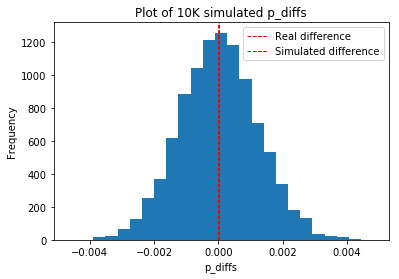

In [292]:
#plot histogram

plt.hist(p_diffs, bins = 25)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs')
plt.axvline(x=(p_new-p_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [295]:
# compute difference from original dataset ab_data.csv
p_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
p_diff

-0.0015782389853555567

In [298]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv is computed as:

p_diffs = np.array(p_diffs)
(p_diffs > p_diff).mean()
print('As a percentage: {}%'.format((p_diffs > p_diff).mean()*100))

As a percentage: 91.01%


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Here we calculated **p-value** in section J. If our sample conformed to the null hypothesis then we would expect the proportion greater than the actual difference to be 0.05 or less. However, we calculate that almost 91% of the population in our simulated sample lies above the real difference which does not only suggest that the new page does not do significantly better than the old page, it might even be worse! **We failed to reject null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [193]:
import statsmodels.api as sm

df2.head(5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [300]:
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [334]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
print "z-score:",z_score, "\np-value:",p_value

z-score: 1.31092419842 
p-value: 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

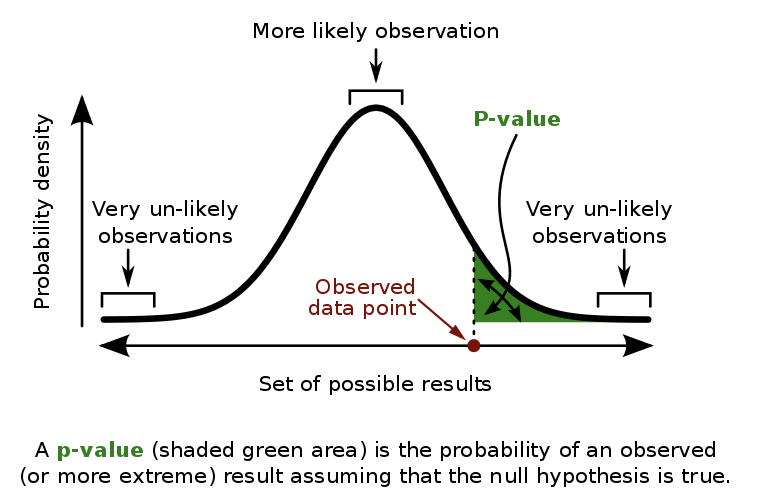

In [315]:
from IPython.display import Image
Image("pvalue.png")

The z-score results are also align with what we already calculated in section **J**. Z-score is the number of standard deviation from the mean for each given data point. Which means there is a difference of 1.31 standard deviation between the conversion rate of new and old page. However, the corresponding **p-value** here suggests that under significant level of 0.05 such a difference is not statistically significant and that we failed to reject null due to lack of enough evidence.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [302]:
# Clone dataframe
df3 = df2 

#Create intercept and ab_page columns
df3['intercept'] = pd.Series(np.zeros(len(df3)), index = df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index = df3.index)

# Find indexes that need to be changed for treatment group
index_to_change = df3[df3['group']=='treatment'].index

# Change values
df3.set_value(index=index_to_change, col='ab_page', value=1)
df3.set_value(index=df3.index, col='intercept', value=1)

# Change datatype
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

# Re-arrange the columns within dataframe
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [307]:
import statsmodels.api as sm
logit = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [308]:
results = logit.fit()

# Show results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        20:17:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.19, which is slightly higher than the p-value of 0.1898 I calculated using the z-test above. Again, the p-value of ab_page prove that the correlation between ab_page and conversion rate statistically is not significant.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding more variables in regression problem might improve the prediction performance of the regression. However, including too many variables increase the complexity of the model and makes it harder to interperet the results. Also, sometimes the added variables might be correlated to eachother and this negatively affects the model's performance.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [317]:
df_countries = pd.read_csv('./countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [326]:
# Creating dummy variables
dfdummy = pd.get_dummies(data = df_countries, columns=['country'], drop_first = True)

# Performing join
df4 = dfdummy.merge(df3, on='user_id') 

# Sorting columns
df4 = df4[['user_id', 'timestamp', 'group', 'landing_page', 
           'ab_page', 'country_UK', 'country_US',
           'intercept', 'converted']]

In [327]:
# Fix Data Types

df4[['ab_page', 'country_UK', 'country_US','intercept', 'converted']].astype(int)
df4.head()

,user_id,timestamp,group,landing_page,ab_page,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0,1,0


In [330]:
# Create new regression model. This time we included individual's country in the model.
logit2 = sm.Logit(df4['converted'], 
                           df4[['intercept', 'country_UK', 'country_US']])

# Fit
result2 = logit2.fit()

# Show results
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:               1.521e-05
Time:                        21:08:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**It appears that even country of individuals does not show any impact on conversion rate by looking at p-values.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [331]:
# Create new regression model. This time we included individual's country in the model.
logit3 = sm.Logit(df4['converted'], 
                           df4[['intercept', 'ab_page', 'country_UK', 'country_US']])

# Fit
result3 = logit3.fit()

# Show results
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:               2.323e-05
Time:                        21:09:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**It appears that a combination of country and page does not show any impact on conversion rate by looking at p-values.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.